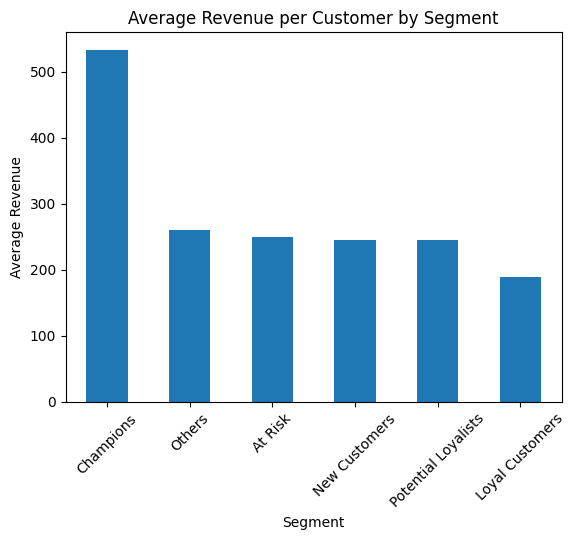

In [16]:
segment_avg = rfm.groupby('Segment')['Monetary'].mean().sort_values(ascending=False)

plt.figure()
segment_avg.plot(kind='bar')
plt.title('Average Revenue per Customer by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.show()

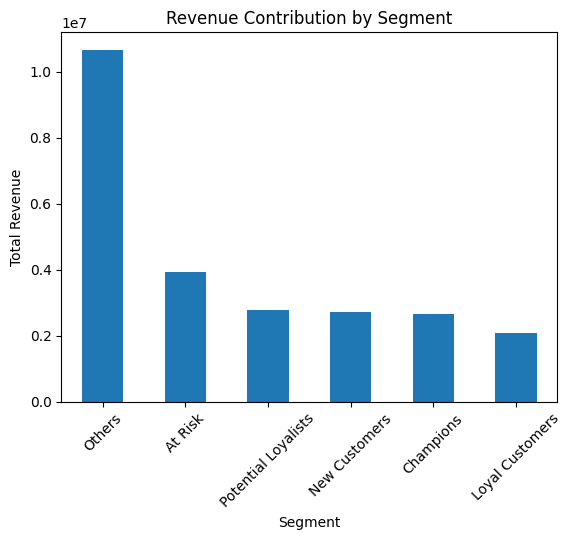

In [14]:
segment_revenue = rfm.groupby('Segment')['Monetary'].sum().sort_values(ascending=False)

plt.figure()
segment_revenue.plot(kind='bar')
plt.title('Revenue Contribution by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

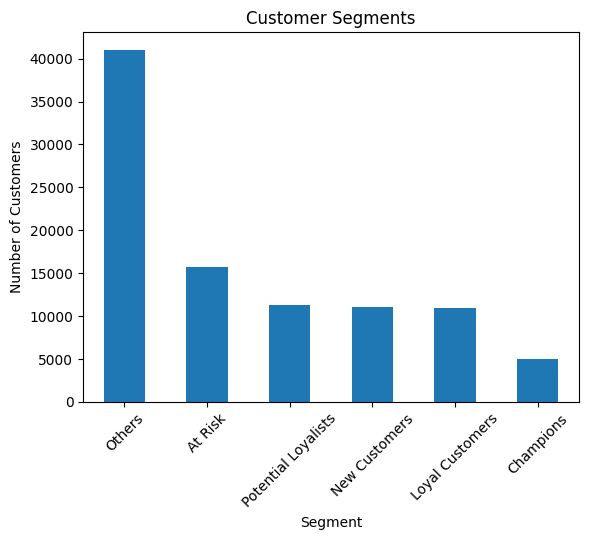

In [13]:
segment_counts = rfm['Segment'].value_counts()

plt.figure()
segment_counts.plot(kind='bar')
plt.title('Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

In [12]:
def segment_customer(row):
    if row['RFM_Score'] in ['555','554','545','544','455']:
        return 'Champions'
    elif row['R_Score'] in [4,5] and row['F_Score'] in [4,5]:
        return 'Loyal Customers'
    elif row['R_Score'] in [3,4] and row['F_Score'] in [3,4]:
        return 'Potential Loyalists'
    elif row['R_Score'] == 5:
        return 'New Customers'
    elif row['R_Score'] in [1,2] and row['F_Score'] in [1,2]:
        return 'At Risk'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

In [11]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

rfm['RFM_Score'] = (
    rfm['R_Score'].astype(str) +
    rfm['F_Score'].astype(str) +
    rfm['M_Score'].astype(str)
)

rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
CustomerID,,,,,,,
14,267,1,256.232791,2,1,3,213
42,346,1,502.656523,1,1,5,115
49,329,1,21.399047,1,1,1,111
59,28,2,249.492696,5,5,3,553
65,316,1,548.006625,1,1,5,115


In [10]:
rfm = df.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (reference_date - x.max()).days,
    'CustomerID': 'count',
    'TotalAmount': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
14,267,1,256.232791
42,346,1,502.656523
49,329,1,21.399047
59,28,2,249.492696
65,316,1,548.006625


In [9]:
reference_date = df['TransactionDate'].max() + pd.Timedelta(days=1)

In [8]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [7]:
print("First 5 rows:")
display(df.head())

First 5 rows:


,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,12/26/2023 12:32,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,8/5/2023 0:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484


In [6]:
df = pd.read_csv('/content/Retail_Transaction_Dataset.csv')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt